In [1]:

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data.csv',
                usecols=['exper', 'wage'])

In [3]:
df

,exper,wage
0,16,548
1,9,481
2,16,721
3,10,250
4,16,729
...,...,...
3005,7,335
3006,15,481
3007,6,500
3008,13,713


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3010 entries, 0 to 3009
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   exper   3010 non-null   int64
 1   wage    3010 non-null   int64
dtypes: int64(2)
memory usage: 47.2 KB


In [5]:
df.describe()

,exper,wage
count,3010.000000,3010.000000
mean,8.856146,577.282392
std,4.141672,262.958302
min,0.000000,100.000000
25%,6.000000,394.250000
50%,8.000000,537.500000
75%,11.000000,708.750000
max,23.000000,2404.000000


In [6]:
df.isnull().sum()

exper    0
wage     0
dtype: int64

In [7]:
df[df.duplicated()].shape

(797, 2)

In [8]:
df[df.duplicated()]

,exper,wage
80,8,500
123,15,625
141,8,635
183,6,500
202,6,577
...,...,...
2997,8,513
3000,8,500
3003,6,470
3006,15,481


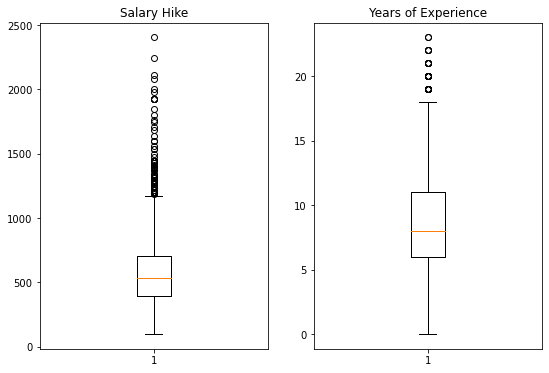

In [9]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df['wage'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(df['exper'])
plt.title('Years of Experience')
plt.show()

In [10]:
#Outlier Treatment

def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i]=p
    return df

In [11]:
df_cleaned = outlier_detect(df)
df_cleaned

,exper,wage
0,16.0,548.0
1,9.0,481.0
2,16.0,721.0
3,10.0,250.0
4,16.0,729.0
...,...,...
3005,7.0,335.0
3006,15.0,481.0
3007,6.0,500.0
3008,13.0,713.0


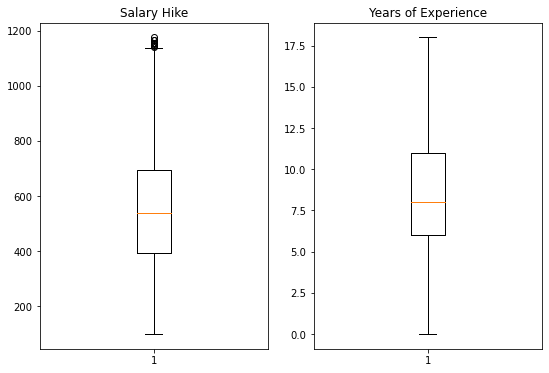

In [12]:
plt.subplots(figsize = (9,6))
plt.subplot(121)
plt.boxplot(df_cleaned['wage'])
plt.title('Salary Hike')
plt.subplot(122)
plt.boxplot(df_cleaned['exper'])
plt.title('Years of Experience')
plt.show()

In [13]:
df.corr()


,exper,wage
exper,1.000000,0.044265
wage,0.044265,1.000000


Visualization of Correlation beteen x and y

<AxesSubplot:xlabel='exper', ylabel='wage'>

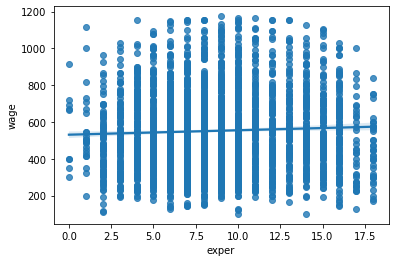

In [14]:
sns.regplot(x=df['exper'],y=df['wage'])  

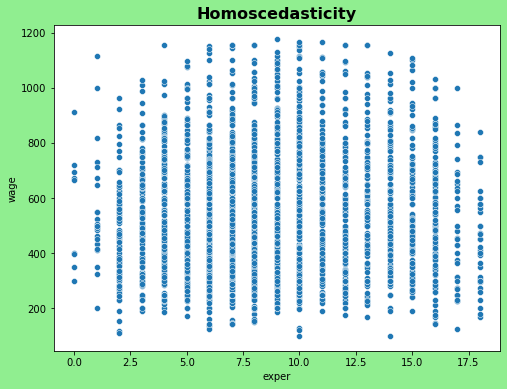

In [15]:
plt.figure(figsize = (8,6), facecolor = 'lightgreen')
sns.scatterplot(x = df['exper'], y = df['wage'])
plt.title('Homoscedasticity', fontweight = 'bold', fontsize = 16)
plt.show()

In [16]:
df.var()

exper       15.071195
wage     44751.578646
dtype: float64

Feature Engineering


Trying different transformation of data to estimate normal distribution and remove any skewness

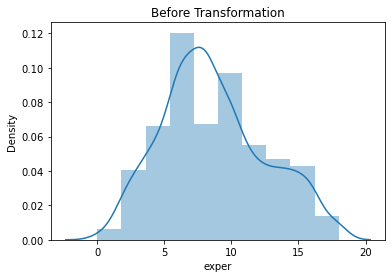

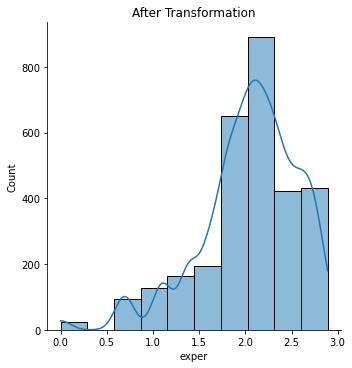

In [17]:
sns.distplot(df['exper'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['exper']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

In [18]:
df['exper'].isnull().value_counts()

False    3010
Name: exper, dtype: int64

In [19]:
df[df['exper'] == 0]

,exper,wage
65,0.0,693.0
384,0.0,913.0
747,0.0,673.0
858,0.0,400.0
1074,0.0,721.0
1095,0.0,664.0
1097,0.0,300.0
1800,0.0,398.0
2461,0.0,350.0


In [20]:
indexDrop = df[(df['exper'] == 0)].index
df = df.drop(indexDrop)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3001 entries, 0 to 3009
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   exper   3001 non-null   float64
 1   wage    3001 non-null   float64
dtypes: float64(2)
memory usage: 70.3 KB


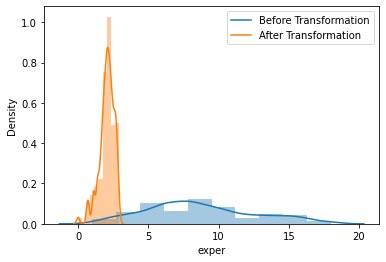

In [21]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['exper'], bins = 10, kde = True)
sns.distplot(np.log(df['exper']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

How log transformation affects the data and it scales the values down.
Before prediction it is necessary to reverse scaled the values, even for calculating RMSE for the models.(Errors)

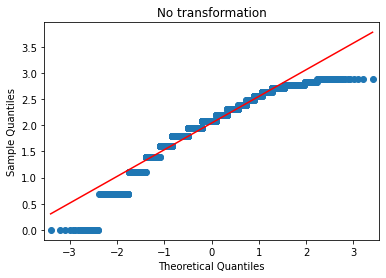

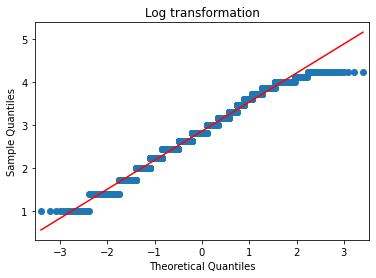

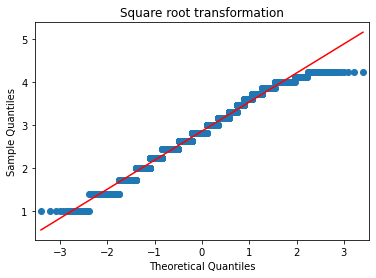

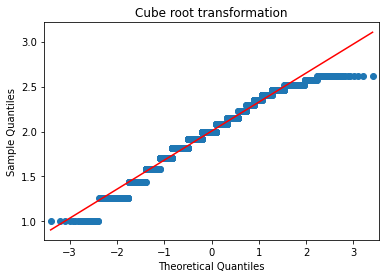

In [22]:
smf.qqplot(np.log(df['exper']), line = 'r')
plt.title('No transformation')
smf.qqplot(np.sqrt(df['exper']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['exper']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['exper']), line = 'r')
plt.title('Cube root transformation')
plt.show()

Fitting a Linear Regression Model
Using Ordinary least squares (OLS) regression
It is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable; the method estimates the relationship by minimizing the sum of the squares in the difference between the observed and predicted values of the dependent variable configured as a straight line

In [23]:
import statsmodels.formula.api as sm
model = sm.ols('wage~exper', data = df[:50]).fit()

In [24]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     1.789
Date:                Tue, 25 Oct 2022   Prob (F-statistic):              0.187
Time:                        20:54:38   Log-Likelihood:                -340.15
No. Observations:                  50   AIC:                             684.3
Df Residuals:                      48   BIC:                             688.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    435.8688     91.053      4.787      0.000     252.795     618.943
exper         11.6386      8.701      1.338      0.187      -5.857      29.134
==============================================================================
Omnibus:                        2.958   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.228   Jarque-Bera (JB):                2.368
Skew:                           0.532   Prob(JB):                        0.306
Kurtosis:                       3.058   Cond. No.                         30.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared and Adjusted R-squared scores are above 0.85.
(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
F-statitics is quite high as well and yes desire it to be higher
But log-likelihood is quite very low far away from 0
and AIC and BIC score are much higher for this model
Lets Try some data transformation to check whether these scores can get any better than this.

Square Root transformation on data

In [25]:
model1 = sm.ols('np.sqrt(wage)~np.sqrt(exper)', data = df[:50]).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.sqrt(wage)   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.405
Date:                Tue, 25 Oct 2022   Prob (F-statistic):              0.242
Time:                        20:54:38   Log-Likelihood:                -148.08
No. Observations:                  50   AIC:                             300.2
Df Residuals:                      48   BIC:                             304.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         18.9267      3.477      5.443      0.000      11.935      25.918
np.sqrt(exper)     1.3155      1.110      1.186      0.242      -0.916       3.546
==============================================================================
Omnibus:                        0.143   Durbin-Watson:                   2.138
Prob(Omnibus):                  0.931   Jarque-Bera (JB):                0.336
Skew:                           0.075   Prob(JB):                        0.845
Kurtosis:                       2.627   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared and Adjusted R-squared scores are above 0.85. but its has gotten less than previous model
(It is a thumb rule to consider Adjusted R-squared to be greater than 0.8 for a good model for prediction)
F-statitics has gotten a little lower for this model than previous.
But log-likelihood got better than before close to 0 higher than previous model
and AIC and BIC score are now much better for this model
Lets Try some data transformation to check whether these scores can get any better than this.

In [26]:
model2 = sm.ols('np.cbrt(wage)~np.cbrt(exper)', data = df[:50]).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.cbrt(wage)   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.233
Date:                Tue, 25 Oct 2022   Prob (F-statistic):              0.272
Time:                        20:54:38   Log-Likelihood:                -75.914
No. Observations:                  50   AIC:                             155.8
Df Residuals:                      48   BIC:                             159.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          6.7455      1.178      5.726      0.000       4.377       9.114
np.cbrt(exper)     0.6160      0.555      1.110      0.272      -0.499       1.731
==============================================================================
Omnibus:                        0.232   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.890   Jarque-Bera (JB):                0.427
Skew:                          -0.074   Prob(JB):                        0.808
Kurtosis:                       2.572   Cond. No.                         19.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
model3 = sm.ols('np.log(wage)~np.log(exper)', data = df[:50]).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           np.log(wage)   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.8600
Date:                Tue, 25 Oct 2022   Prob (F-statistic):              0.358
Time:                        20:54:38   Log-Likelihood:                -27.915
No. Observations:                  50   AIC:                             59.83
Df Residuals:                      48   BIC:                             63.65
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         5.9458      0.306     19.415      0.000       5.330       6.562
np.log(exper)     0.1265      0.136      0.927      0.358      -0.148       0.401
==============================================================================
Omnibus:                        1.449   Durbin-Watson:                   2.171
Prob(Omnibus):                  0.485   Jarque-Bera (JB):                1.447
Skew:                          -0.361   Prob(JB):                        0.485
Kurtosis:                       2.583   Cond. No.                         13.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model Testing
As Y = Beta0 + Beta1*(X)

Finding Coefficient Parameters (Beta0 and Beta1 values)

In [28]:
model.params

Intercept    435.868775
exper         11.638618
dtype: float64

Here, (Intercept) Beta0 value = 560.394232 & (YearsExperience) Beta1 value =  1.906942
Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e if (P_value < α=0.05 ; Reject Null)
Null Hypothesis as Beta1=0 (No Slope) and Alternate Hypthesis as Beta1≠0 (Some or significant Slope)

In [29]:
print(model.tvalues,'\n',model.pvalues)

Intercept    4.786983
exper        1.337564
dtype: float64 
 Intercept    0.000017
exper        0.187342
dtype: float64


(Intercept) Beta0: tvalue=49.537709 , pvalue=0.000000
(daily) Beta1: tvalue=1.648015, pvalue= 1.648015
As (pvalue=0)<(α=0.05); Reject Null hyp. Thus, X(YearsExperience) variable has good slope and variance w.r.t Y(Salary) variable.
R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.
Measure goodness-of-fit by finding rsquared values (percentage of variance)

In [30]:
model.rsquared,model.rsquared_adj

(0.035933127556889155, 0.015848401047657723)

Determination Coefficient = rsquared value = 0.95 ; very good fit >= 85%

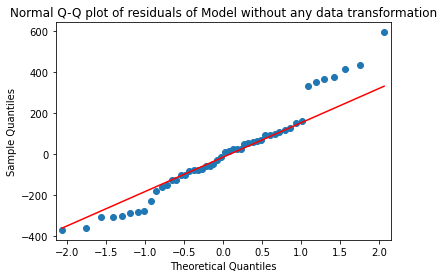

In [31]:
import statsmodels.api as sm
sm.qqplot(model.resid, line = 'q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
plt.show()

In [32]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

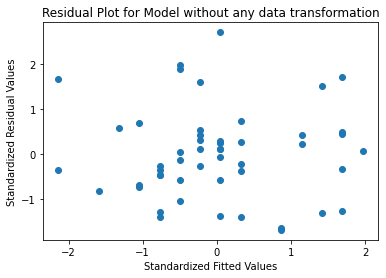

In [33]:
plt.scatter(get_standardized_values(model.fittedvalues), get_standardized_values(model.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

Model Validation


We will analyze Mean Squared Error (MSE) or Root Mean Squared Error (RMSE) — AKA the average distance (squared to get rid of negative numbers) between the model’s predicted target value and the actual target value.


Comparing different models with respect to the Root Mean Squared Errors

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
model1_pred_y =np.square(model1.predict(df['exper'][:50]))
model2_pred_y =pow(model2.predict(df['exper'][:50]),3)
model3_pred_y =np.exp(model3.predict(df['exper'][:50]))

In [36]:
model1_rmse =np.sqrt(mean_squared_error(df['wage'][:50], model1_pred_y))
model2_rmse =np.sqrt(mean_squared_error(df['wage'][:50], model2_pred_y))
model3_rmse =np.sqrt(mean_squared_error(df['wage'][:50], model3_pred_y))
print('model=', np.sqrt(model.mse_resid),'\n' 'model1=', model1_rmse,'\n' 'model2=', model2_rmse,'\n' 'model3=', model3_rmse)

model= 222.4179179307626 
model1= 219.56127711151456 
model2= 220.6923428577913 
model3= 223.87389148801688


In [37]:
rmse = {'model': np.sqrt(model.mse_resid), 'model1': model1_rmse, 'model2': model3_rmse, 'model3' : model3_rmse}
min(rmse, key=rmse.get)

'model1'

Predicting values

In [41]:
# first model results without any transformation
predicted2 = pd.DataFrame()
predicted2['exper'] = df['exper'][:50]
predicted2['wage']= df['wage'][:50]
predicted2['Predicted_wage'] = pd.DataFrame(np.square(model1.predict(df['exper'][:50])))
predicted2

,exper,wage,Predicted_wage
0,16.0,548.0,585.084461
1,9.0,481.0,523.176511
2,16.0,721.0,585.084461
3,10.0,250.0,532.987544
4,16.0,729.0,585.084461
5,8.0,500.0,512.902625
6,9.0,565.0,523.176511
7,9.0,608.0,523.176511
8,10.0,425.0,532.987544
9,11.0,515.0,542.403678


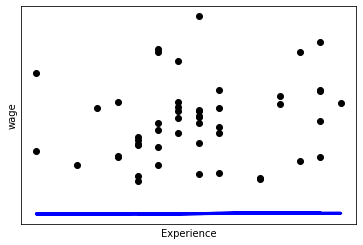

In [39]:
plt.scatter(df['exper'][:50], df['wage'][:50],  color='black')  
plt.plot(df['exper'][:50], predicted2['Predicted_wage'], color='blue', linewidth=3)  
plt.xticks(())  
plt.yticks(())  
plt.xlabel('Experience')  
plt.ylabel('wage')   
plt.show()